### random number generators and hacker statistics

In [1]:
# use simulated repeated measurement to compute probabilities

In [2]:
import numpy as np

In [18]:
np.random.seed(42)
print(np.random.random())
print(np.random.random())

0.3745401188473625
0.9507143064099162


In [29]:
random_numbers = np.empty(100000)
np.random.seed(42)
for i in range(100000):
    random_numbers[i] = np.random.random()


###  Simulating n coin flips

In [74]:
def perform_bern_trials(n, p, size):
    n_success = 0
    for i in range(n):
        heads = np.random.random(size=size) < p
        n_heads = np.sum(heads)
        
        if n_heads == 4:
            n_success += 1
    return n_success/n

In [112]:
perform_bern_trials(100000, 0.5, 4)

0.06306

### Perform n Bernoulli trials with success probability p and return number of successes

In [123]:
def bern2(n, p):
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success

In [124]:
bern2(1000, 0.05)

47

### How many defaults might we expect?

In [136]:
np.random.seed(42)
n_defaults = np.empty(1000)

for i in range(1000):
    n_defaults[i] = bern2(100, 0.05)

In [137]:
bern2(100, 0.05)

7

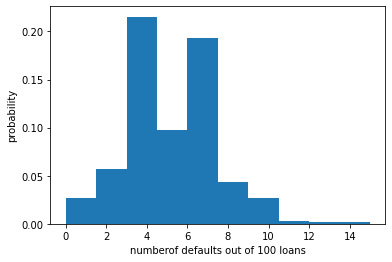

In [138]:
import matplotlib.pyplot as plt
_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('numberof defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.show()

### Will the bank fail
<b>Plot the number of defaults you got from the previous exercise, as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?<b>

In [146]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    
    return x, y

In [147]:
bern2(100, 0.05)

6

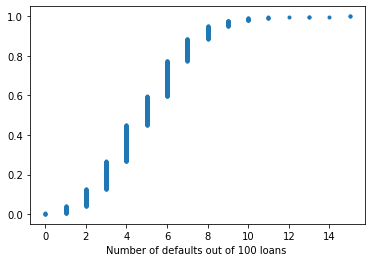

In [148]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot CDF
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of defaults out of 100 loans ')
plt.show()

In [151]:
# Compute the number of 100-loan simulations with 10 or 
# more defaults: n_lose_money

n_loose_money = np.sum(n_defaults >= 10)
n_loose_money

22

In [153]:
# Compute and print probability of losing money
print(n_loose_money/len(n_defaults))

0.022
